# Project One

## THE RELSTIONSHIP BETWEEN SAT SCORES AND NYC PUBLIC SCHOOL CHARACTERISTICS IN 2014-2015 SCHOOL YEAR 

### Introduction
The entire project aims to find and analyze the linear relationship between SAT scores (Y) and school characteristics of NYC public schools, particularly the share of minorities and locations (X's). At the end, we will understand what and how  school characteristics influenced students' SAT scores (Y) in NYC public schools in 2014-2015 school year. The dataset is downloaded from https://www.kaggle.com/nycopendata/high-schools, where the high school data was compiled and published by the New York City Department of Education, and the SAT score averages and testing rates were provided by the College Board.

Particularly in Project One, I will conduct exploratory analysis on average SAT scores and the percentage of White, Black, Hispanic,and Asian students in NYC public schools in 2014-2015 school year by investigating their distributions and calculating, comparing, and plotting data statistics. Then, I will evaluate the sufficiency of the evidence drawn from the data and comment on what the evidence can be used to solve the problem.

#### 1. Load and Clean the Data

In [1]:
import pandas as pd 
import numpy as np 
import qeds
qeds.themes.mpl_style()
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.patches as patches
%matplotlib inline 

In [2]:
#load the data
df = pd.DataFrame(pd.read_csv("C:/Users/Owner/Desktop/ECO225/wk3/GitExercise/project 1/scores.csv"))
#take a look at what variables are included in the DataFrame
df.columns
#I want to investigate the average total scores, so we create a new column and add three scores together
df['Average SAT Score'] = df['Average Score (SAT Math)'] + df['Average Score (SAT Reading)'] + \
df['Average Score (SAT Writing)']
# remove all rows with NaNs, rest the index, and drop the unwanted columns
satdf = df.drop(['School ID', 'Building Code', 'Street Address', 'State', 'Phone Number', 'Average Score (SAT Math)',\
                'Average Score (SAT Reading)', 'Average Score (SAT Writing)'], axis = 1)
satdf = satdf.dropna().reset_index().drop(["index"], axis = 1)
#convert entries with "%" to float type data
satdf.columns
for i in range(9, 14):
    satdf[satdf.columns[i]] = satdf[satdf.columns[i]].str.replace("%", "")
    satdf[satdf.columns[i]] = pd.to_numeric(satdf[satdf.columns[i]])
satdf.head(2)
#satdf.info(), uncomment to check the type of data

,School Name,Borough,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested,Average SAT Score
0,"New Explorations into Science, Technology and ...",Manhattan,Manhattan,10002,40.71873,-73.97943,8:15 AM,4:00 PM,1735.0,28.6,13.3,18.0,38.5,91.0,1859.0
1,Essex Street Academy,Manhattan,Manhattan,10002,40.71687,-73.98953,8:00 AM,2:45 PM,358.0,11.7,38.5,41.3,5.9,78.9,1193.0


#### 2. Summary Statistics of Independent and Dependent Variables
The independent variables(Y) is`Average SAT Score` and the dependent variables (X's) are `Percent White`, `Percent Black`, `Percent Hispanic`, and `Percent Asian`.

In [3]:
d0 = satdf[['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian']]
satdf2 = pd.concat([satdf['Average SAT Score'], d0], axis = 1)
d1 = pd.concat([satdf2.describe(), satdf2.mode()], axis = 0)
d1.rename(index = {0: 'mode'})
d1.round(decimals = 2)

,Average SAT Score,Percent White,Percent Black,Percent Hispanic,Percent Asian
count,374.00,374.00,374.00,374.00,374.00
mean,1275.35,8.52,35.39,43.93,10.41
std,194.87,13.36,25.37,24.50,14.40
min,924.00,0.00,0.00,2.60,0.00
25%,1157.00,1.30,16.40,20.82,1.60
50%,1226.00,2.60,28.75,45.30,4.20
75%,1327.00,9.38,50.10,63.38,11.15
max,2144.00,79.90,91.20,100.00,88.90
0,1161.00,1.20,0.00,56.90,0.00


From the summary table above, mean of the `Average SAT Score` is greater than its median, this implies that the distribution of `Average SAT Score` is right skewed. By appling the comparison to the dependent variables, notice that except for `Percent Hispanic` whose distribution is left skewed, those of `Percent White`, `Percent Black`, and `Percent Asian` are all right skewed. The minimum Average SAT score of public schools is 924 whereas the highest scores in 2144. The range is 1220, which is very large. This shows that there is a large gap between the effectiveness of educationa and the quality of teaching of best schools and worst schools. The interquartile range of `Average SAT Score` is 170 and its standard deviation is around 195, showing that the distribution of `Average SAT Score` has a long tail on the right since the third quartile is within mean±2σ, but the maximum is outside the interval of mean±4σ.  

I noticed that the percentage of White, Black, and Asian students in some NYC public schools is 0% and it happens more often for Black and Asian students since the modes for `Percent Black` and `Percent Asian` are also 0. 
In contrast, the percentage of Hispanic students reached 100% in some schools. By looking at the mean and median (50%) of the dependent variables, I found that the values for `Percent White` and `Percent Asian` are similar but much smaller than that of `Percent Black` and `Percent Hispanic`. This means that, overall, NYC public schools have more Hispanic and Black students than White and Asian. Also, the standard deviations for `Percent White` and `Percent Asian` are similar and smaller than those of `Percent Black` and `Percent Hispanic`. This mean that distributions of former ones are less spreaded or dispersed than those of latter ones.
Meanwhile, the ranges and IQRs of `Percent Black` and `Percent Hispanic` are greater than those of `Percent White` and `Percent Asian`. 

Besides, the size of the dataset is 374, which is small. So there may not be sufficient evidence for us solve the question accurately.

#### 3. Plot Independent Variable
The independent variables(Y) is`Average SAT Score`. I plot a histogram to see the distribution of avgerage SAT scores of NYC Public Schools in 2014-2015 school year.

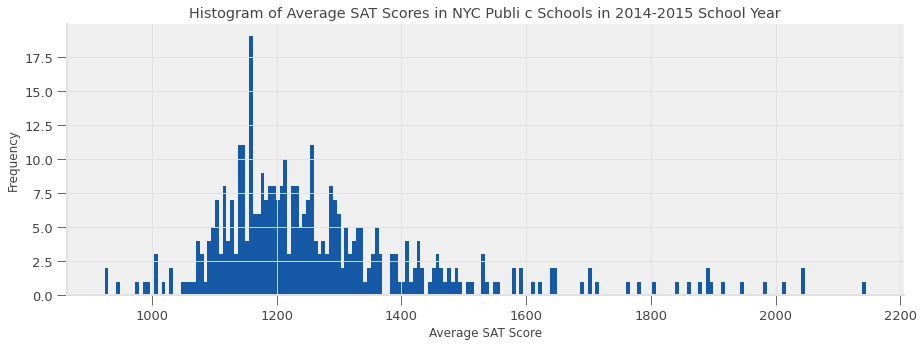

In [4]:
#get the number of rows/schools in the dataframe, used to determine number of bins
len(satdf)
d2 = satdf['Average SAT Score']
plt.rcParams["figure.figsize"] = (15, 5)
d2.plot.hist(bins = 200, title = 'Histogram of Average SAT Scores in NYC Publi c Schools in 2014-2015 School Year', \
             fontsize = 13) 
plt.xlabel('Average SAT Score') 
plt.show()

The distribution of `Average SAT Score` is right skewed, with the mode at 1161 (based on the graph and the summary statistics in section 2). The shape is reasonable since few students get very low or very high scores in the test, and most students get scores somewhere in the middle. This finding from the histogram corresponds to the those in section 2 from the summary table.

#### 4. Plot Dependent Variables
The dependent variables(X) are `Percent White`, `Percent Black`, `Percent Hispanic`, `Percent Asian`.

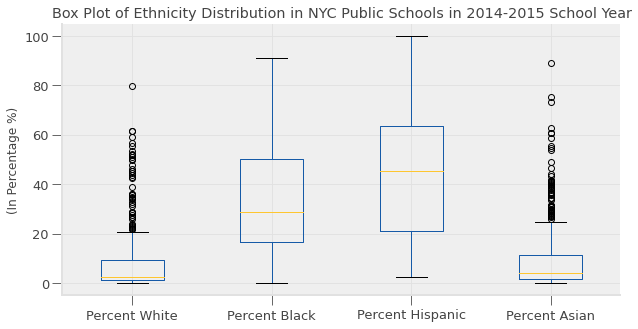

In [5]:
plt.rcParams["figure.figsize"] = (10, 5)
d0.boxplot(fontsize = 13)
plt.title('Box Plot of Ethnicity Distribution in NYC Public Schools in 2014-2015 School Year')
plt.ylabel('(In Percentage %)')
plt.show()

From the boxplot, the percentage of Hispanic students is the highest among NYC Public Schools in 2014-2015 School Year, followed by that of Black students, Asian, and White Students. 

Notice that the distribution of `Percent White`and `Percent Asian` look similar. The values are mainly below 20% with a lot of outliers that are larger than the main 'body' of the data. So, they are both right skewed. Their range, first, second, third quartiles, and thus IQR are about the same value.

The range of `Percent Black` and `Percent Hispanic` are similar, but their distributions are different. `Percent Black`'s distribution is slightly right skewed whereas `Percent Hispanic`'s is left skewed. There is no outlier in their data. Overall, the percentage of Hispanic students is around 5% higher than the percentage of Black students.

These findings correspond to what we got in section 2 from the summary table.

#### 5. Plot The Correlation
In this section, I will calculate and plot the correlation between average SAT scores (Y) and the percentage of White, Black, Hispanic, and Asian students (X's).

In [6]:
#the menthod calculates the correlation between all columns in the dataframe
#for simplicity, we only take a look at the first column of the resulted dataframe
satdf2.corr()['Average SAT Score'][1:len(satdf2)]

Percent White       0.622380
Percent Black      -0.302675
Percent Hispanic   -0.410191
Percent Asian       0.608893
Name: Average SAT Score, dtype: float64

The results above are the correlation between average SAT scores and the percentage of White, Black, Hispanic, and Asian students respectively. To get a better understanding, I made scatterplots for average SAT scores against each `Percent`.

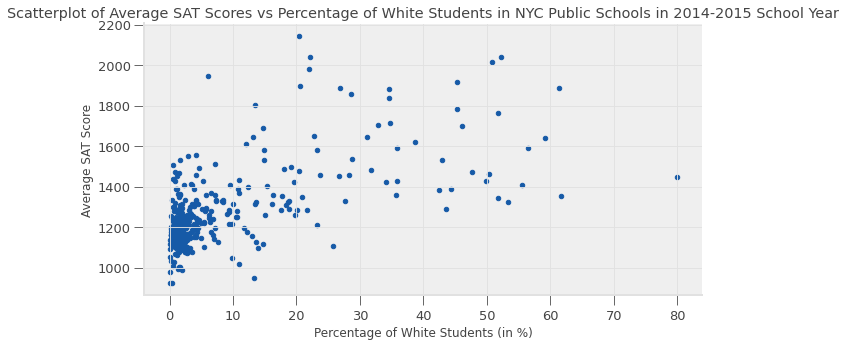

In [7]:
plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent White', y = 'Average SAT Score', fontsize = 13)
plt.title('Scatterplot of Average SAT Scores vs Percentage of White Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of White Students (in %)')
plt.show()

The correlation between `Average SAT Score` and `Percent White` is 0.622380, indicating a moderate positive relationship bewteen the average SAT score and the percentage of White students in NYC Public Schools in 2014-2015 School Year. From the scatterplot, it can be seen that overall, the average SAT score increases with increaseing percentage of White students. This pattern is not clear since most of the data cluster at the left bottom corner. Doing a log transformation may solve the problem, but the interpretation of the transformed variable is less meaningful.

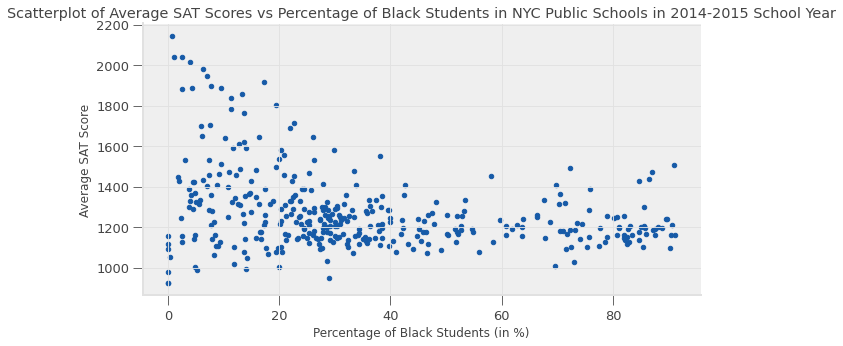

In [8]:
plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent Black', y = 'Average SAT Score', fontsize = 13)
plt.title('Scatterplot of Average SAT Scores vs Percentage of Black Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of Black Students (in %)')
plt.show()

The correlation between `Average SAT Score` and `Percent Black` is -0.302675, indicating a weak negative relationship bewteen the average SAT score and the percentage of Black students in NYC Public Schools in 2014-2015 School Year. From the scatterplot, it can be seen that when `Percent Black` is less than 40%, the average SAT score decreases in general with increaseing percentage of Black students whereas the `Average SAT Score` remained steady as `Percent Black` increase from 40% to above 80%.

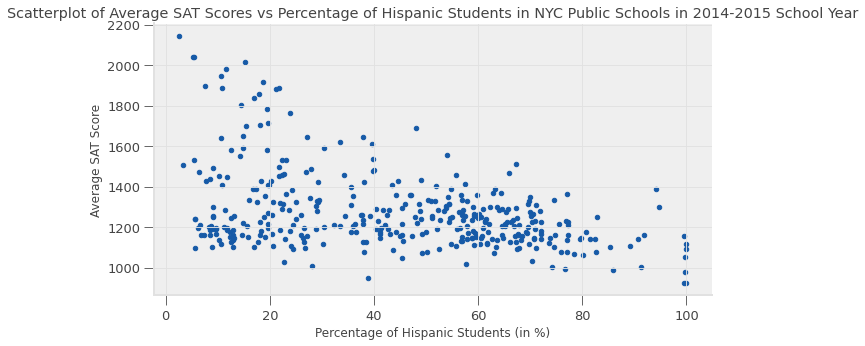

In [9]:
plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent Hispanic', y = 'Average SAT Score', fontsize = 13)
plt.title('Scatterplot of Average SAT Scores vs Percentage of Hispanic Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of Hispanic Students (in %)')
plt.show()

This scatterplot is similar to the one with `Percent Black`. The correlation between `Average SAT Score` and `Percent Hispanic` is -0.410191, indicating a weak negative relationship bewteen the average SAT score and the percentage of Hispanic students in NYC Public Schools in 2014-2015 School Year. From the scatterplot, it can be seen that when `Percent Hispanic` is less than 40%, the average SAT score decreases in general with increaseing percentage of Hispanic students whereas the pattern gets unclear as `Percent Black` increase from 40% to 100%.

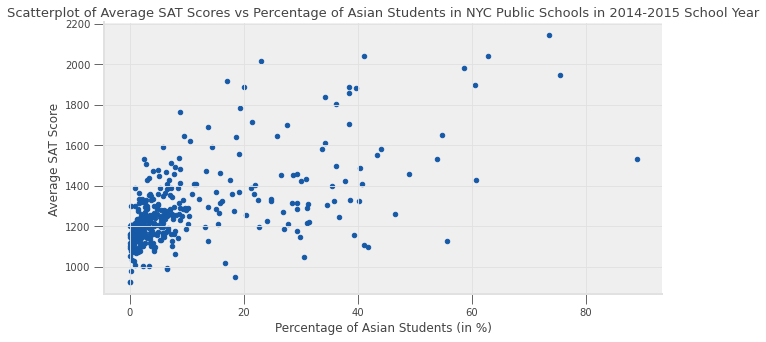

In [10]:
plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent Asian', y = 'Average SAT Score')
plt.title('Scatterplot of Average SAT Scores vs Percentage of Asian Students in NYC Public Schools \
in 2014-2015 School Year', fontsize = 13)
plt.xlabel('Percentage of Asian Students (in %)')
plt.show()

This scatterplot is similar to the one with `Percent White`. The correlation between `Average SAT Score` and `Percent Asian` is 0.608893, indicating a moderate positive relationship bewteen the average SAT score and the percentage of Asian students in NYC Public Schools in 2014-2015 School Year. From the scatterplot, it can be seen that overall, the average SAT score increases with increaseing percentage of Asian students.

#### 6. Deeper Investigation using GroupBy
In this section, I will use Groupby to explore more about the covariates and their correlations with the outcome.

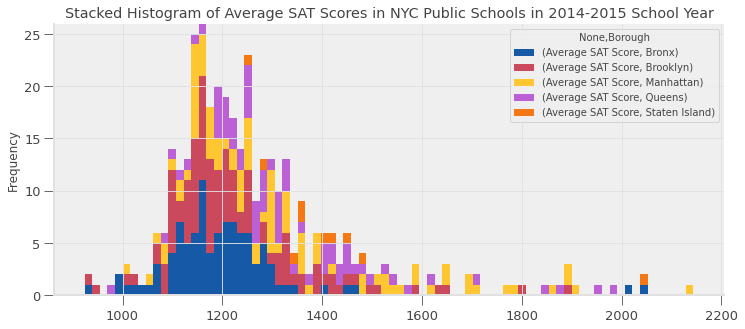

In [11]:
#investigate the number of groups by each variable
df["City"].unique() 
df["Borough"].unique()
satdf3 = pd.concat([satdf[["Borough", "City"]], satdf2], axis = 1)
satdf3.columns
sat_B = satdf3[["Average SAT Score", "Borough"]]
plt.rcParams["figure.figsize"] = (12, 5)
sat_B.pivot(columns = "Borough").plot(kind = 'hist', stacked = True, bins = 80, fontsize = 13)
plt.title("Stacked Histogram of Average SAT Scores in NYC Public Schools in 2014-2015 School Year")
plt.show()

From the stacked histogram above, it can be seen that the distributions of Average SAT Scores in NYC Public Schools in 2014-2015 School Year are similar across boroughs.


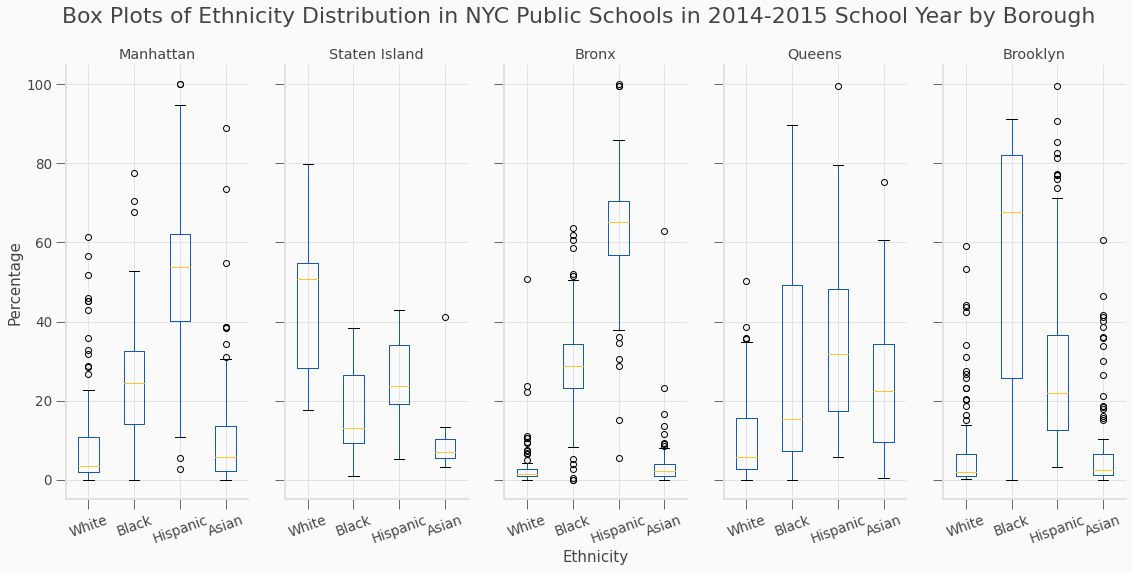

In [12]:
satdf4 = satdf3.rename(columns = {"Percent White": "White", "Percent Black": "Black", "Percent Hispanic": "Hispanic",\
                       "Percent Asian": "Asian"})

def single_box_plot(df, b, ax):
    """
    This function creates a single boxplot for distribution of ethnic groups across Boroughs
    """
    # Filter data to keep only the data of interest
    _df = satdf4.drop("Average SAT Score", axis = 1).loc[satdf4['Borough'] == b]
    _df.plot(kind = "box", ax = ax, fontsize = 13.5, rot = 20)
    return ax

fig, ax = plt.subplots(1, 5, figsize = (19, 8), sharey = True)

for (i, b) in enumerate(satdf4.Borough.unique()):
    single_box_plot(satdf4, b, ax[i])
    ax[i].set_title(str(b))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
fig.suptitle("Box Plots of Ethnicity Distribution in NYC Public Schools in 2014-2015 School Year by Borough", fontsize = 22)
ax[0].set_ylabel("Percentage", fontsize = 15)
ax[2].set_xlabel("Ethnicity", fontsize = 15)

for (i, _ax) in enumerate(ax):
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)
    
    _ax.set_facecolor(bgcolor) 

The above are box plots of Ethnicity Distribution in NYC Public Schools in 2014-2015 School Year across boroughs. Notice that the distribution varies significantly between boroughs.

The distribution of ethnicity in Bronx and Manhattan are similar: `Percent White`, `Percent Asian`, and `Percent Black` are right skewed, `Percent Hispanic` is slightly left skewed. The percentage of White and Asian students are the least and have similar values, followed by the percentage of Black and Hispanic. These 2 boroughs have similar patterns of ethnicity distribution as the entire NYC in section 3.

For Brooklyn, the distribution of `Percent White` and `Percent Asian` are similar: right skewed, similar quartiles and range. But here, `Percent Hispanic` is also right skewed, with smaller values than `Percent Black` in general. Here, `Percent Black` is slightly left skewed and with the larget range and quartile values among all ethnicity groups.

Then, in Queens, the four variables' distributions all have right skewness. Overall,  `Percent White` has the smallest value. followed by  `Percent Asian`,  `Percent Black`, and `Percent Hispanic`.

In Staten Island, it is obvious that `Percent White` has the highest value among all ethnicity groups, with slight left skewness. This situation only exists in borough Staten Island. The distributions of the variables of other 3 ethnicity groups are right skewed with `Percent Hispanic` having larger values, followed by `Percent Black` and `Percent Asian`.

Since the pattern in Staten Island is so distinct from others, I take a look at the average scores and evaluate the findings based on the number of schools investigated in each borough.

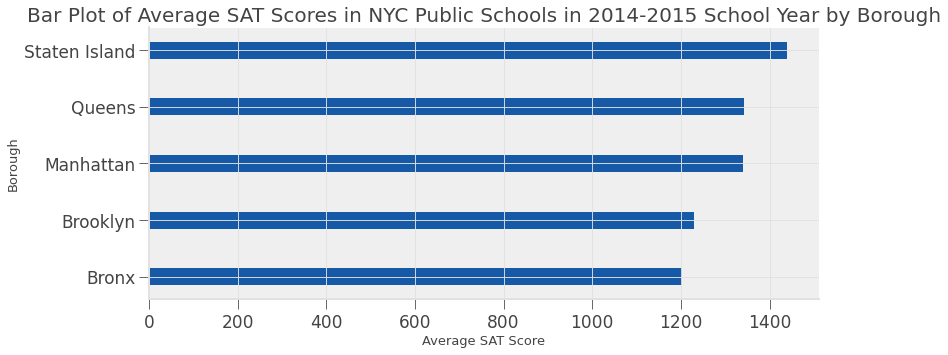

In [13]:
plt.rcParams["figure.figsize"] = (12, 5)
fig, ax = plt.subplots()
gbb = satdf4[["Borough", "Average SAT Score"]].groupby("Borough").mean().sort_values('Average SAT Score', ascending = True)
gbb.plot(kind = "barh", ax = ax, legend = False, fontsize = 17, width = 0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Bar Plot of Average SAT Scores in NYC Public Schools in 2014-2015 School Year by Borough", fontsize = 20)
ax.set_xlabel("Average SAT Score", fontsize = 13)
ax.set_ylabel("Borough", fontsize = 13)
plt.show()

In [14]:
sat_B.groupby("Borough").count().rename(columns = {'Average SAT Score':'Number of Schools'})
# satdf3.groupby("Borough")['City'].value_counts().to_frame(name = "Number of Schools")

,Number of Schools
Borough,
Bronx,98
Brooklyn,109
Manhattan,89
Queens,68
Staten Island,10


See from the bar plot that schools in Staten Island has the highest Average SAT scores compared to other boroughs. But since the number of schools in Staten Island investigated in the dataset is 10, which is too small, there is insufficient evidence to conclude that greater percentage of White students will have positive impact on the SAT scores. 

Besides, among the other 4 boroughs, schools in Manhattan has the highest Average SAT scores, but from the boxplot, `Percent Hispanic` is the highest among all ethnicity groups. We cannot conclude higher proportion of Hispanic students at school also leads to higher average SAT scores because in Bronx, `Percent Hispanic` is also the highest, but its average score is the lowest among all boroughs in NYC from the barplot.



### Conclusion
The distribution of average SAT scores are similar across the boroughs in NYC such that the overall distribution also has similar patterns as them: right skewed. But the distribution of ethnicity varies from boroughs to boroughs, and the overall pattern is largely influeced by the places that have larger amount of data in the dataset. 

So far, by looking at the pattern generally and individually, their isn't sufficient evidence to find a relationship between average SAT scores and ethnicity distribution. To better understand the relationship, we need to either increase the size of the dataset by adding more statistics or include more covariates into consideration and run a linear regression of X on Y.

# Project Two

## Introduction
In Project Two, I will conduct deeper exploratory analysis on the data to investigate the association between enthnicity distribution(X), locations, and average SAT scores (Y). I will use the Zipcode (ZCTA) shapefile https://www2.census.gov/geo/tiger/TIGER2019/ZCTA5/tl_2019_us_zcta510.zip and the counties shape file https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip for the maps.

Also, I will evaluate the sufficiency of the evidence drawn from the data and comment on what the evidence can be used to solve the problem.

### THE MESSAGE 
I want to investigate whether the average SAT score and the average ethnic proportion groups in schools differ across Boroughs/Cities and by how much. I will only keep the plots that conveys information clearly.

### Plots for THE MESSAGE

In [15]:
# A bar plot comparing average SAT scores across Boroughs and Cities.
satdf5 = satdf4[["Borough", "City", "Average SAT Score"]].groupby(["Borough", "City"]).mean()
gbc = satdf5.sort_values('Average SAT Score', ascending = True).reset_index()
gbm_b = satdf4[["Borough", "White", "Black", "Hispanic", "Asian"]].groupby("Borough").mean()
gbm_c = satdf4[["City", "White", "Black", "Hispanic", "Asian"]].groupby("City").mean()

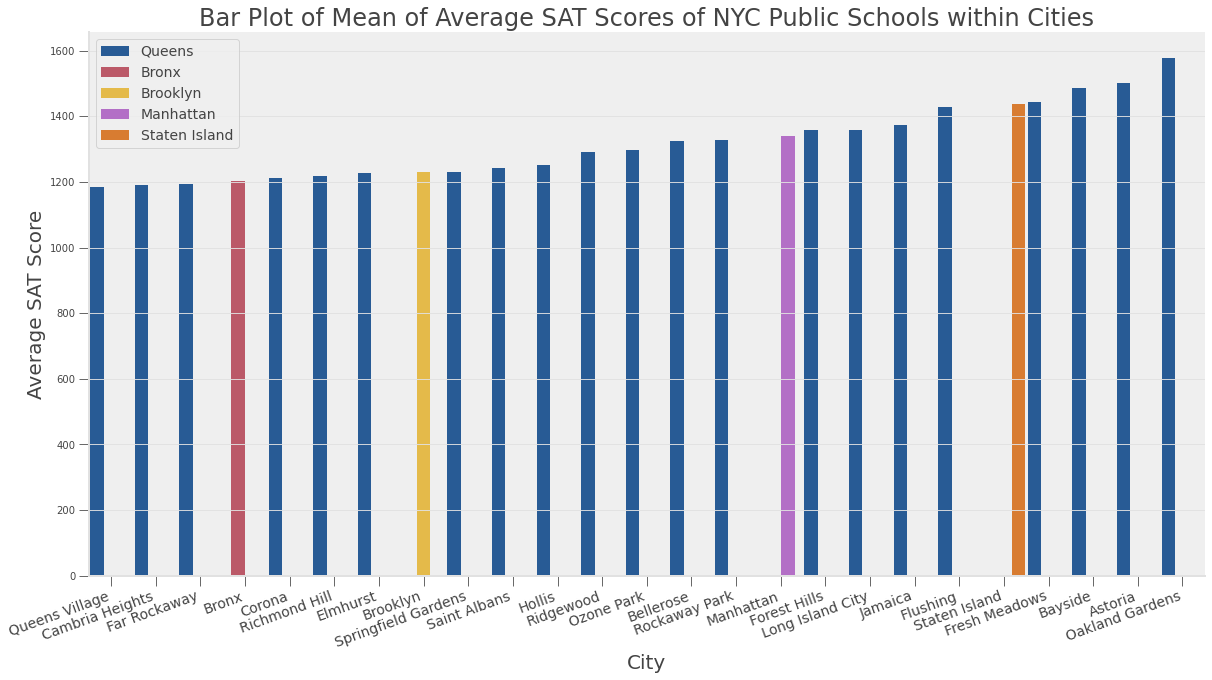

In [16]:
import seaborn as sns
fig,ax = plt.subplots()
fig.set_size_inches(20, 10)
p = sns.barplot(x = 'City', y ='Average SAT Score', data = gbc, hue = 'Borough', ax = ax)

#fine-tune
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 0.5)

change_width(ax, 0.3)

plt.legend(prop={'size': 14})
p.set_xticklabels(p.get_xticklabels(), rotation = 20, horizontalalignment = 'right', fontsize = 14)
ax.set_xlabel("City", fontsize = 20)
ax.set_ylabel("Average SAT Score", fontsize = 20)
ax.set_title('Bar Plot of Mean of Average SAT Scores of NYC Public Schools within Cities', fontsize = 24)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

Seen from the plot above, the distribution of average SAT scores of schools in cities of Queens Borough is faily even (i.e. the number of schools within certain range of SAT scores is similar). But within the Borough, variations of average SAT scores of schools is large across cities as the lowest is below 1200 while the highest is around 1600.
For the other 4 boroughs, not much information can be drawn from the plot since they only have one city included in the dataset. We can only see that the average SAT scores of schools in Staten Island Borough is the highest among the four, followed by Manhattan, Brooklyn and Bronx.

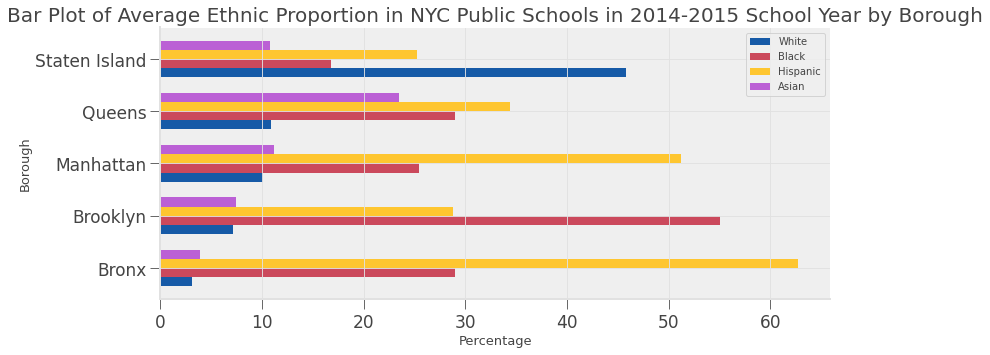

In [17]:
plt.rcParams["figure.figsize"] = (12, 5)
fig, ax = plt.subplots()
gbm_b.plot(kind = "barh", ax = ax, legend = True, fontsize = 17, width = 0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Bar Plot of Average Ethnic Proportion in NYC Public Schools in 2014-2015 School Year by Borough", fontsize = 20)
ax.set_xlabel("Percentage", fontsize = 13)
ax.set_ylabel("Borough", fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

From the bar plot above, it can be seen that within Borough Queens, Manhattan, Brooklyn, and Bronx, the average percentage of Hispanic and Black students are the highest, followed by that of Asian and White. So we can expect the average SAT scores of schools in these Boroughs are close if assume all other characteristics of schools are the same.

The pattern changes in Borough Staten Island. The average percentage of White is the highest. We could expect difference in average SAT scores of schools in Staten Island and other 4 Boroughs, keeping all other characteristics of schools the same.

In [18]:
#This plot is MESSY!

# plt.rcParams["figure.figsize"] = (12, 20)
# fig, ax = plt.subplots()
# gbm_c.plot(kind = "barh", ax = ax, legend = True, fontsize = 17, width = 0.7)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.set_title("Bar Plot of Average Ethnic Proportion in NYC Public Schools in 2014-2015 School Year by City", fontsize = 20)
# ax.set_xlabel("Percentage", fontsize = 13)
# ax.set_ylabel("City", fontsize = 13)
# plt.show()

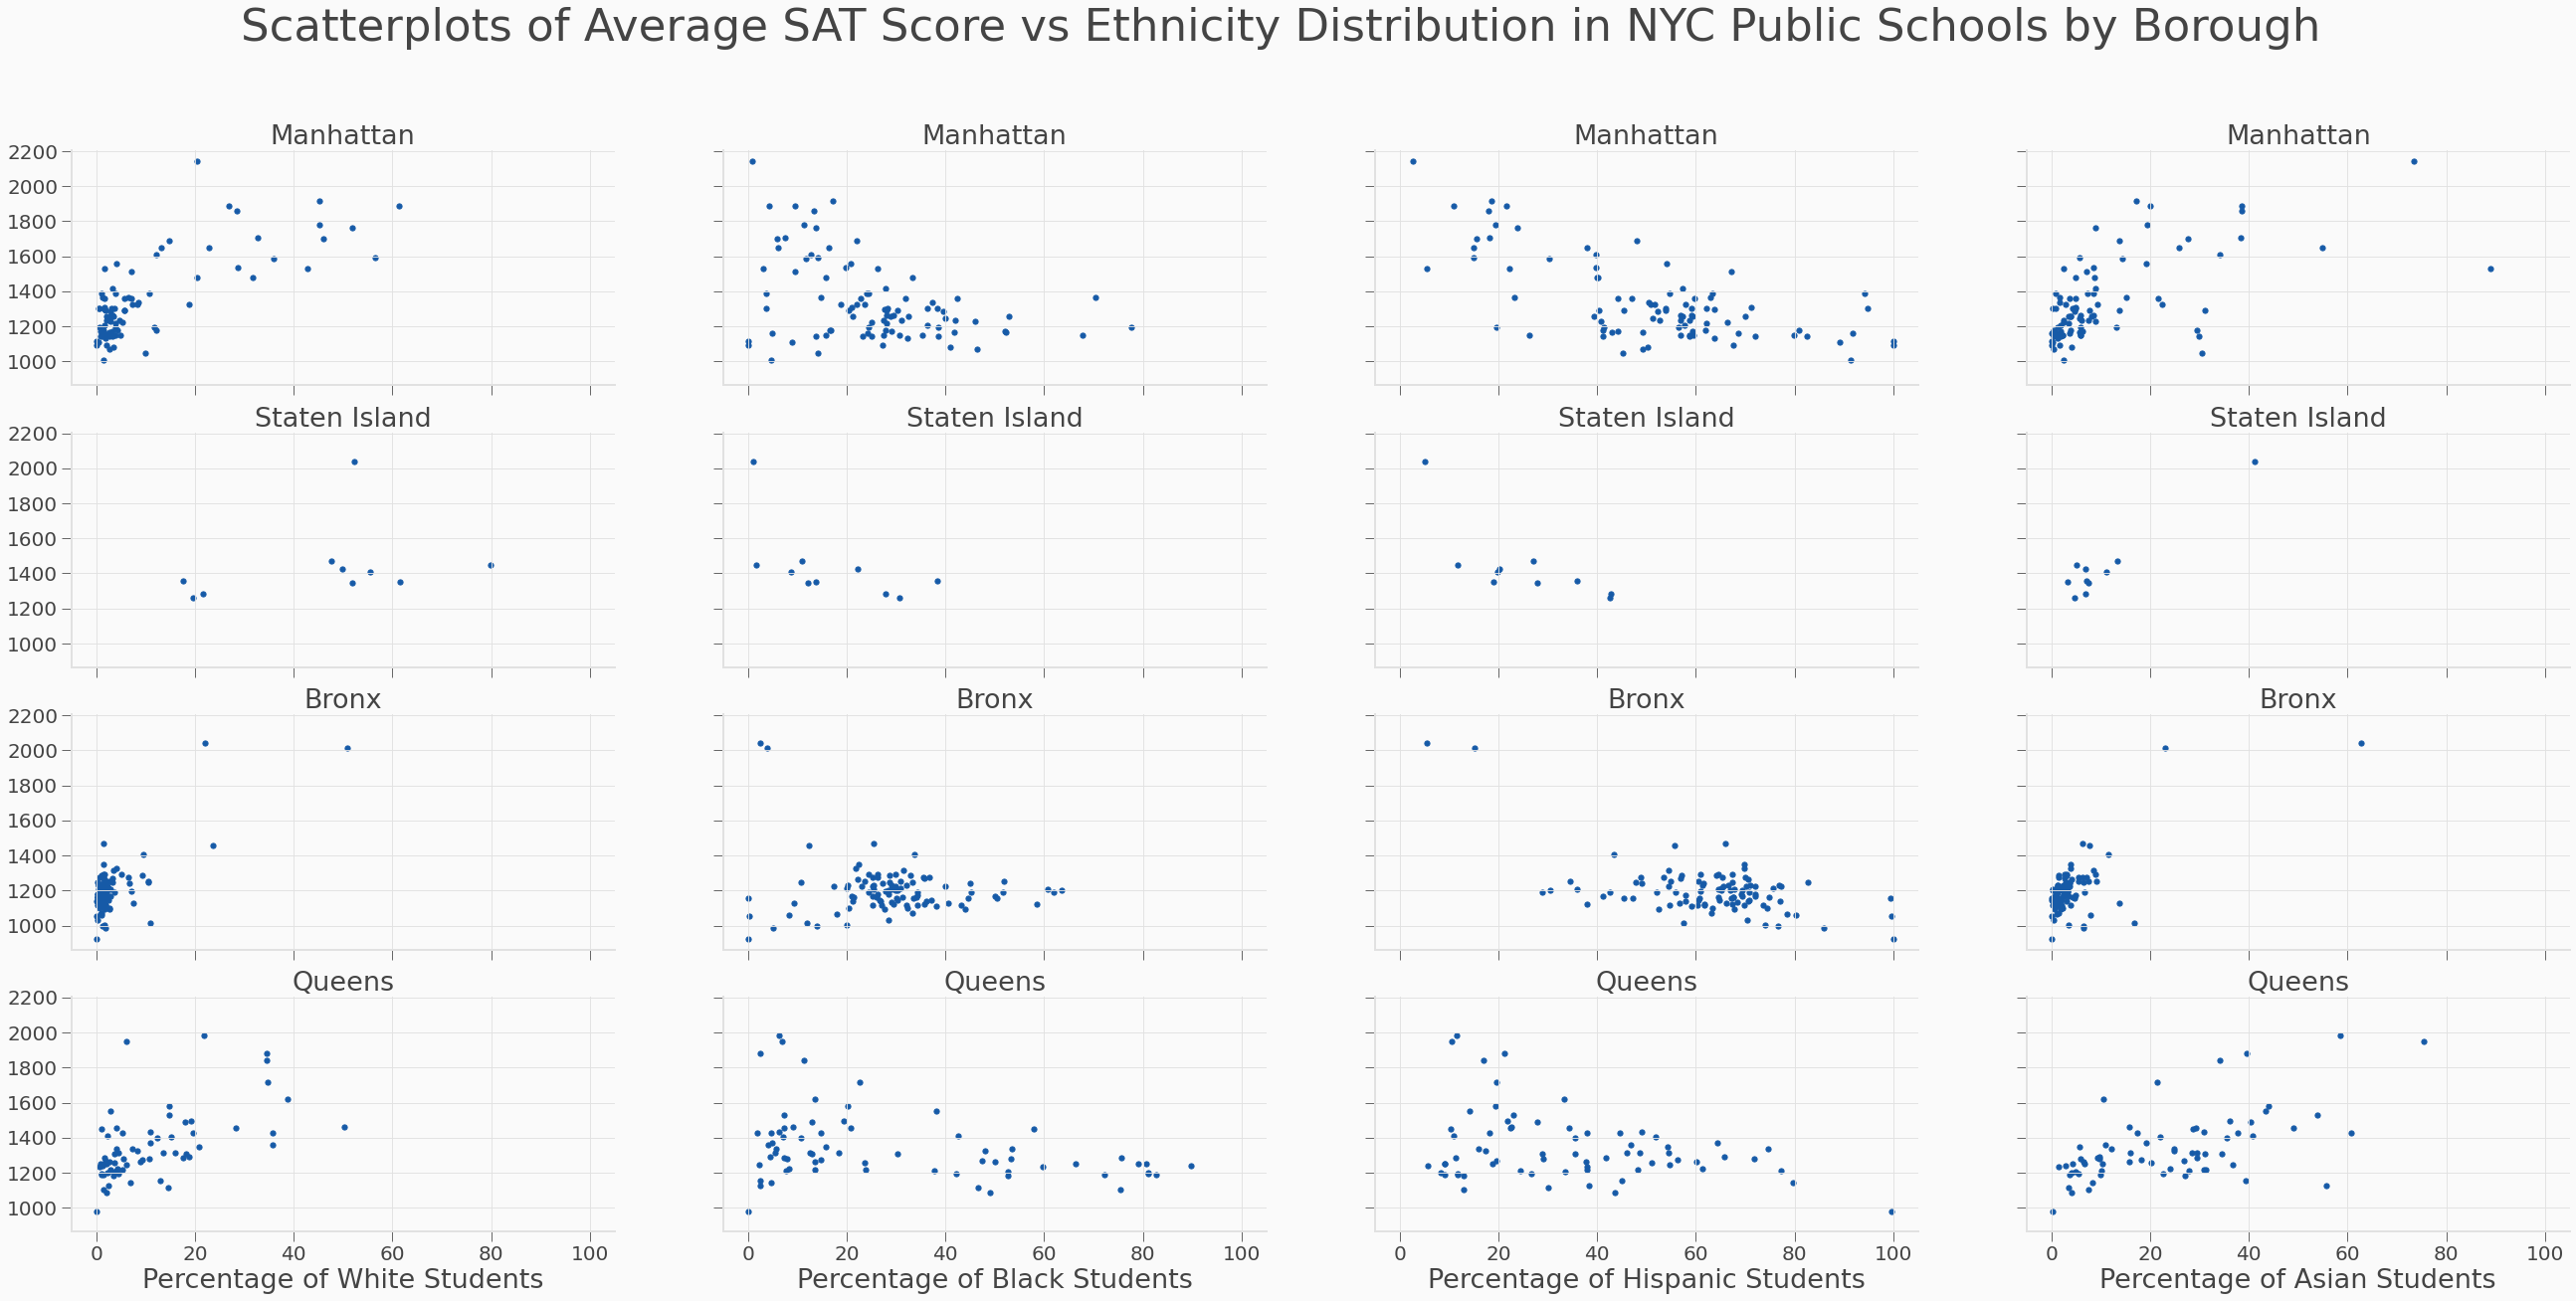

In [19]:
# scatterplots for scores by borough vs percentage of ethnicity (4 boroughs here)

def single_scatter_plot(df, b, r, ax):
    """
    This function creates a single scatterplot of average SAT score against the distribution of ethnic groups 
    """
    # Filter data to keep only the data of interest
    _df = satdf4.query("Borough == @b")[["Average SAT Score", r]]
    _df.plot(kind = "scatter", x = r, y = "Average SAT Score", ax = ax, fontsize = 20, s = 27)

    return ax


fig, ax = plt.subplots(4, 4, figsize = (45, 20), sharey = True, sharex = True)
bgcolor = (250/255, 250/255, 250/255)

for i in range(4):
    for j in range(4):
        single_scatter_plot(satdf4, satdf4.Borough.unique()[i], list(satdf4)[3:][j], ax[i, j]) 
        ax[i, j].set_ylabel("")
        ax[i, j].spines['right'].set_visible(False)
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].set_facecolor(bgcolor) 
        ax[i, j].set_title(str(satdf4.Borough.unique()[i]), fontsize = 27)
        if i == 3:
            ax[i, j].set_xlabel(("Percentage of " + str(list(satdf4)[3:][j]) + " Students"), fontsize = 27)
        
fig.set_facecolor(bgcolor)
fig.suptitle("Scatterplots of Average SAT Score vs Ethnicity Distribution in NYC Public Schools by Borough", fontsize = 45)
plt.show()

The plots above are the scatterplots of average SAT score of school in each borough against the ethnic shares in NYC Public Schools. Scatterplots enable us to have a more direct and clear look at the correlation between percentage of students with certain ethnicity and the school's average SAT score.

First, notice that there is few points in the scatterplot for Staten Island boroug, implying there is small number of sample for this borough in our data set. We see a positive correlation between average SAT score and `Percent Asian` and a moderate negative correlation between average SAT score and `Percent Hispanic`. But due to the the small size of data, we cannot draw the conclusion for the correlation with 100% confidence.

Second, for the remaining 3 boroughs, there are weak positive correlations between average SAT score and `Percent White` as well as `Percent Asian`. Meanwhile, there are weak negative correlations between average SAT score and `Percent Black` as well as `Percent Hispanic`. 

Since the pattern is not strong enough to indicate correlation between the ethnic shares and average SAT score, we need deeper investigations to find out any other confounders that impacts the relationship between two variables.

### Map for THE MESSAGE
We want to invesigate whether location is a confounders that impacts the relationship between ethnic shares and average SAT scores. For all maps in this section, the grey part is the location where none of the schools is included in the dataset.

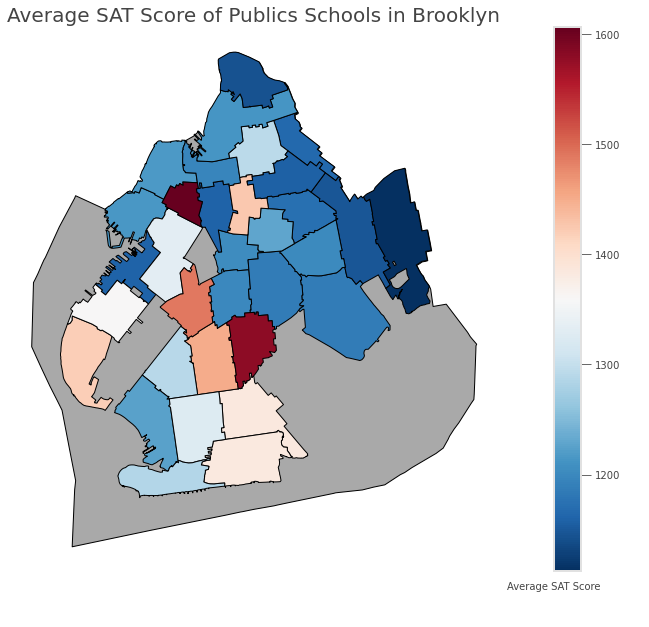

In [20]:
# Average SAT grades for each zip code in Kings County
import geopandas as gpd
from shapely.geometry import Point
#1. calculate average SAT scores for each zip code in Kings County 
zip_df = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/ZCTA5/tl_2019_us_zcta510.zip") 
zip_df.dtypes
satdf6 = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Average SAT Score"]].groupby("Zip Code").mean().reset_index()
satdf6 = satdf6.astype({'Zip Code': 'str'})
satdf6.dtypes

#2. merge with the zipfile, keep the df with less info, check for column info before merging
mdf = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf6, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")
mdf.head()
type(mdf)

#3. plot the info on map
# 1)Plot the map of King County
county = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip") 
county_df = county.query("(STATEFP == '36') & (NAME == 'Kings')") 
county_df.head()
fig, gax = plt.subplots(figsize = (20, 10)) 

county_df.plot(ax = gax, edgecolor = "black", color = "darkgrey") 
# 2) Add relevant info
mdf.plot(ax = gax, edgecolor = 'black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r')
# 3) Annotate & Add labels
gax.annotate('Average SAT Score', xy = (0.78, 0.06),  xycoords = 'figure fraction')
gax.set_title('Average SAT Score of Publics Schools in Brooklyn', fontsize = 20)

# 3) Fine-tune
plt.axis('off')
plt.show()

It is obvious that, overall, the average SAT scores of northern regions in Kings County are lower than that in the south and the middle of the county. But 2 areas with zip codes 11216 and 11217 in the north are exceptions: their zip code-level score is much higher than the other places near them. And since around 2/3 part of the county is missing in the dataset, we do not have sufficient evidence to conclude that the southern and middle part of King county have higher SAT scores on average than the northern part.

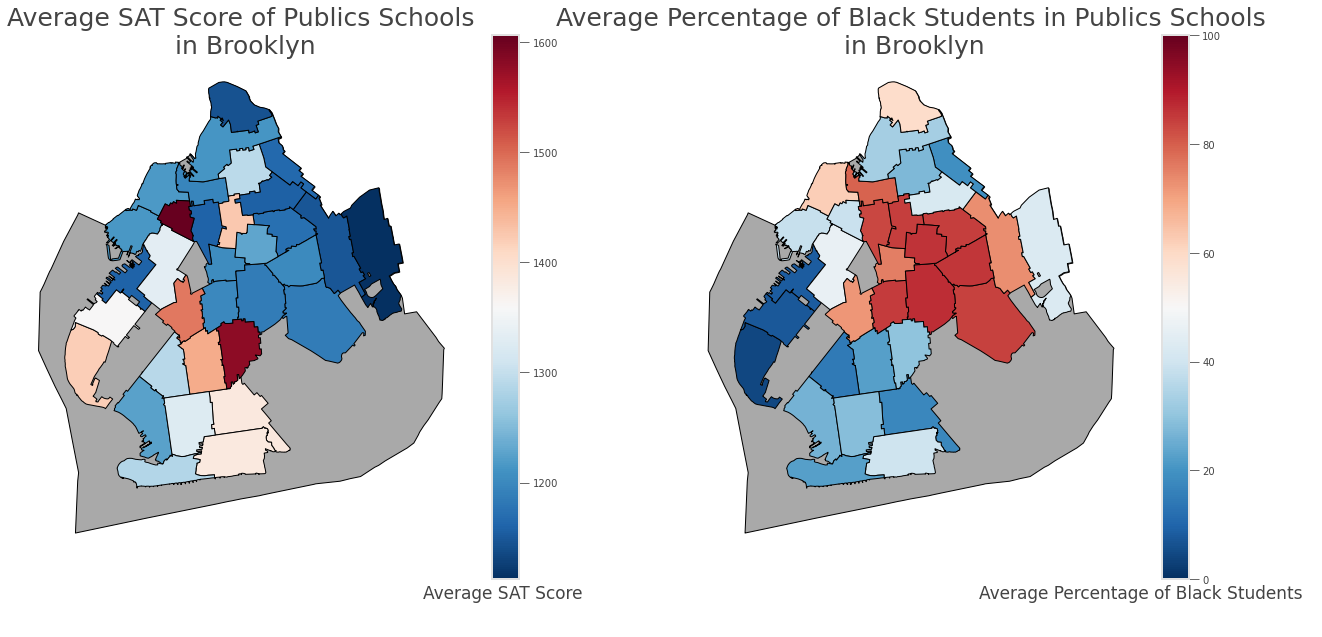

In [21]:
# Plot Average Percentage of Black students for each zip code in Kings County with Average SAT score side-by-side

satdf7 = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Percent Black"]].groupby("Zip Code").mean().reset_index()
satdf7 = satdf7.astype({'Zip Code': 'str'})
mdf2 = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf7, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")

fig, gax = plt.subplots(figsize = (22, 10), ncols = 2) 

county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
mdf.plot(ax = gax[0], edgecolor='black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r')
gax[0].annotate('Average SAT Score', xy = (0.32, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[0].set_title('Average SAT Score of Publics Schools\n in Brooklyn', fontsize = 25)
gax[0].axis('off')

county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
mdf2.plot(ax = gax[1], edgecolor='black', column = 'Percent Black', legend = True, cmap = 'RdBu_r', vmin = 0, vmax = 100)
gax[1].annotate('Average Percentage of Black Students', xy = (0.74, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[1].set_title('Average Percentage of Black Students in Publics Schools\n in Brooklyn', fontsize = 25)
gax[1].axis('off')

plt.show()

The plot above relates the average SAT score and the average percentage of Black students at schools in the Kings County. 

From the plot, public schools in the middle of the county have a higher proportion of Black students, which is around 80%. See that the corresponding regions have relatively lower average SAT scores. And as the contrast of colors in the remaining regions is significant, the majority of the rest part of the county where the average `Percent Black` is high have lower average SAT score. Thus, there may be large negative correlation between `Percent Black` and `Average SAT Score`.

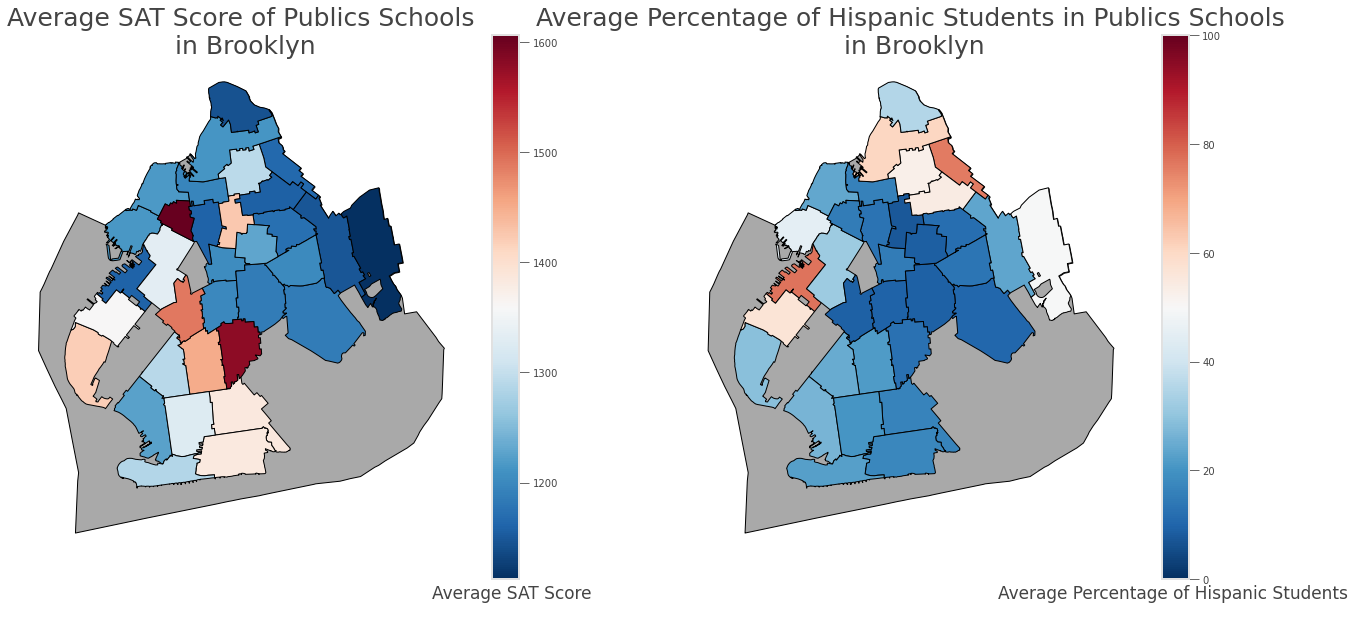

In [22]:
# Plot Average Percentage of Hispanic students for each zip code in Kings County with Average SAT score side-by-side

satdf9 = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Percent Hispanic"]].groupby("Zip Code").mean().reset_index()
satdf9 = satdf9.astype({'Zip Code': 'str'})
mdf4 = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf9, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")

fig, gax = plt.subplots(figsize = (22, 10), ncols = 2) 

county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
mdf.plot(ax = gax[0], edgecolor='black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r')
gax[0].annotate('Average SAT Score', xy = (0.32, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[0].set_title('Average SAT Score of Publics Schools\n in Brooklyn', fontsize = 25)
gax[0].axis('off')

county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
mdf4.plot(ax = gax[1], edgecolor='black', column = 'Percent Hispanic', legend = True, cmap = 'RdBu_r', vmin = 0, vmax = 100)
gax[1].annotate('Average Percentage of Hispanic Students', xy = (0.74, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[1].set_title('Average Percentage of Hispanic Students in Publics Schools\n in Brooklyn', fontsize = 25)
gax[1].axis('off')

plt.show()

The plot above relates the average SAT score and the average percentage of Hispanic students at schools in the Kings County. 

From the plot, some regions where the average percentage of Hispanic students is high have lower average SAT score. But compared with `Percent Black`, the correlation between `Percent Hispanic` and `Average SAT Score` is weaker since the contrast of colors between maps is less significant than the previous one. This implies that there may be a weak negative correlation between `Percent Hispanic` and `Average SAT Score`.

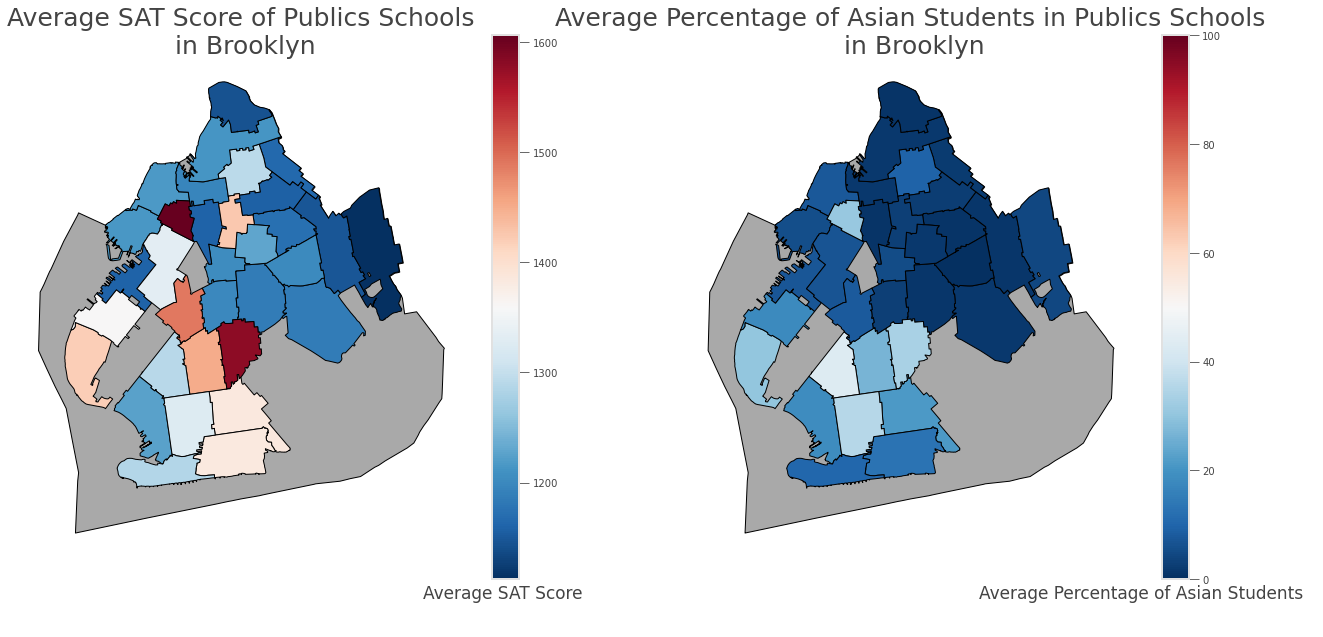

In [23]:
# Plot Average Percentage of Asian students for each zip code in Kings County with Average SAT score side-by-side

satdf10 = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Percent Asian"]].groupby("Zip Code").mean().reset_index()
satdf10 = satdf10.astype({'Zip Code': 'str'})
mdf5 = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf10, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")

fig, gax = plt.subplots(figsize = (22, 10), ncols = 2) 

county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
mdf.plot(ax = gax[0], edgecolor='black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r')
gax[0].annotate('Average SAT Score', xy = (0.32, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[0].set_title('Average SAT Score of Publics Schools\n in Brooklyn', fontsize = 25)
gax[0].axis('off')

county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
mdf5.plot(ax = gax[1], edgecolor='black', column = 'Percent Asian', legend = True, cmap = 'RdBu_r', vmin = 0, vmax = 100)
gax[1].annotate('Average Percentage of Asian Students', xy = (0.74, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[1].set_title('Average Percentage of Asian Students in Publics Schools\n in Brooklyn', fontsize = 25)
gax[1].axis('off')

plt.show()

The plot above relates the average SAT score and the average percentage of Asian students at schools in the Kings County. 

From the map on the right, the northeast public schools of the county has an extremely low proportion of Asian students, which is below 10%. And see that the avergae SAT score of the corresponding region is not significantly high, except for area with zip code 11216. For the rest parts, some regions where the average percentage of Asian students is low have higher average SAT score. This implies that there may be a moderate or weak negative correlation between `Percent Asian` and `Average SAT Score`.

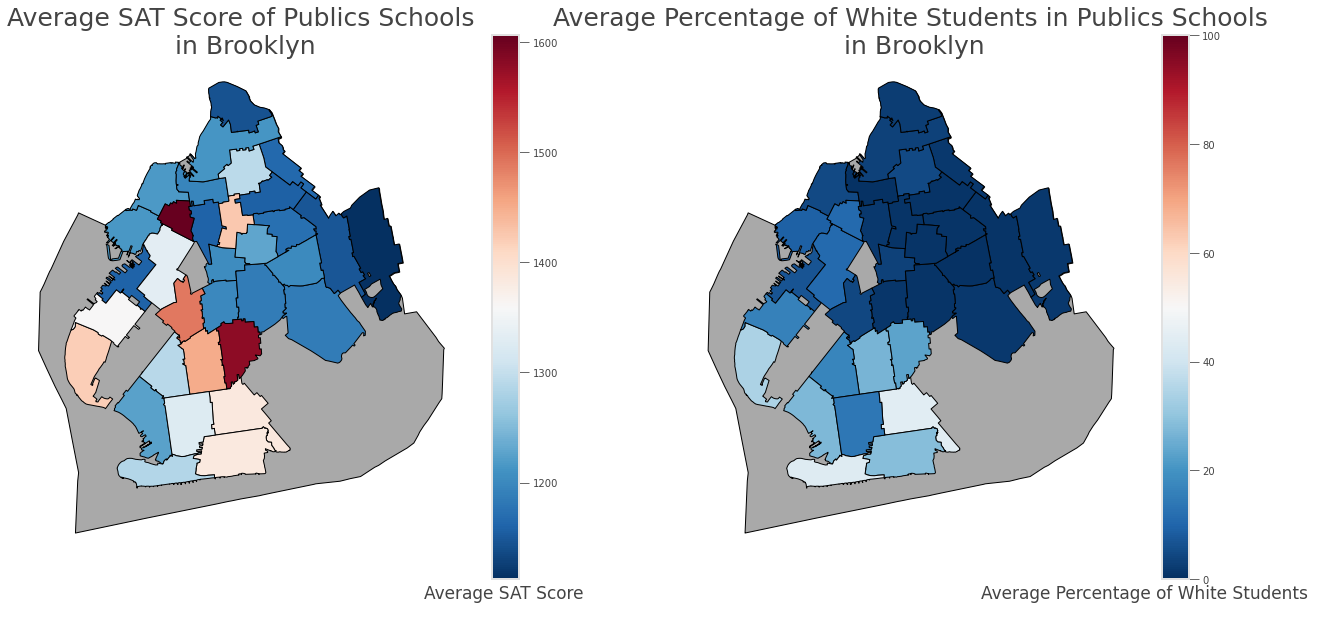

In [24]:
# Plot Average Percentage of White students for each zip code in Kings County with Average SAT score side-by-side

satdf8 = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Percent White"]].groupby("Zip Code").mean().reset_index()
satdf8 = satdf8.astype({'Zip Code': 'str'})
mdf3 = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf8, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")

fig, gax = plt.subplots(figsize = (22, 10), ncols = 2) 

county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
mdf.plot(ax = gax[0], edgecolor='black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r')
gax[0].annotate('Average SAT Score', xy = (0.32, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[0].set_title('Average SAT Score of Publics Schools\n in Brooklyn', fontsize = 25)
gax[0].axis('off')

county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
mdf3.plot(ax = gax[1], edgecolor='black', column = 'Percent White', legend = True, cmap = 'RdBu_r', vmin = 0, vmax = 100)
gax[1].annotate('Average Percentage of White Students', xy = (0.74, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[1].set_title('Average Percentage of White Students in Publics Schools\n in Brooklyn', fontsize = 25)
gax[1].axis('off')

plt.show()

The plot above relates the average SAT score and the average percentage of White students at schools in the Kings County. 

The map on the right is almost the same as the one for `Percent Asian`, with few difference. Similarly, the northeast public schools of the county has an extremely low proportion of White students, which is below 10%. And see that the avergae SAT score of the corresponding region is not significantly high, except for area with zip code 11216. 
For the rest parts, some regions where the average percentage of White students is low have higher average SAT score. This implies that there may be a moderate or weak negative correlation between `Percent White` and `Average SAT Score`.

### Maps with Bokeh Library
The HTML to my project is https://drive.google.com/file/d/1pgCVnYsvolYm879uqKgZ0m4XOHkcK-oG/view?usp=sharing (in Google Drive).

In [25]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json

Loading BokehJS ...

In [26]:
# Average SAT grades for each zip code in Kings County
dfzc = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Average SAT Score"]].groupby("Zip Code").count().rename(
    columns = {"Average SAT Score": "Num"}).reset_index()
dfzc = dfzc.astype({'Zip Code': 'str'})
satdf11 = satdf.query("Borough == 'Brooklyn'")[['Zip Code', 'Percent White', 'Percent Black', 'Percent Hispanic', \
                                                'Percent Asian', "Average SAT Score"]].groupby("Zip Code").mean().reset_index()
satdf11 = satdf11.astype({'Zip Code': 'str'})
# merge with the zipfile, keep the df with less info, check for column info before merging
mdf = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf11, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")
mdf.head()

hoverdf = pd.merge(mdf, dfzc, left_on = "Zip Code", right_on = "Zip Code", how = "outer") 
hoverdf = hoverdf.rename(columns = {"Percent White": "White", "Percent Black": "Black", "Percent Hispanic": "Hispanic",\
                       "Percent Asian": "Asian"})
#hoverdf.head()

The plot above relates the average SAT score and the average percentage of Asian students at schools in the Kings County. 

From the map on the right, the northeast public schools of the county has an extremely low proportion of Asian students, which is below 10%. And see that the avergae SAT score of the corresponding region is not significantly high, except for area with zip code 11216. For the rest parts, some regions where the average percentage of Asian students is low have higher average SAT score. This implies that there may be a moderate or weak negative correlation between `Percent Asian` and `Average SAT Score`.

In [27]:
#Convert data to geojson for bokeh
kings_geojson = GeoJSONDataSource(geojson = hoverdf.to_json())
color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 1150, high = 1600)
color_bar = ColorBar(color_mapper = color_mapper, label_standoff = 8,width = 500, height = 20,
                     border_line_color = None, location = (0,0), orientation = 'horizontal')

hover = HoverTool(tooltips = [ ('Zip Code','@ZCTA5CE10'), ('Percentage of White Students', '@White'),
                              ('Percentage of Black Students', '@Black'),
                               ('Percentage of Hispanic Students','@Hispanic'),
                               ('Percentage of Asian Students', '@Asian'),
                              ('Total Number of Schools','@Num')])

p = figure(title = "Average SAT Score in Parts of Brooklyn by Zip Codes", tools = [hover])
p.patches("xs", "ys", source = kings_geojson, fill_color = {'field' :'Average SAT Score', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

The color in the plot above indicates the zip code-level mean of average SAT scores in parts of Kings County. The locations that have no public school included in the dataset is not shown. Besides, when the cursor is moved to the region, regional information of average proportion of White, Black, Hispanic, Asian students and number of public schools recorded will display. 

For most southern and middle part of Kings county, only 1 or 2 public schools is included in the datase. Therefore, the correlation between minority shares and average SAT scores of schools in that particular region will be overrepresented by the school in our sample. For example, places with zip code 11216 and 11217 are mentioned as exceptions multiple times above. And the numbers of schools recorded in that region are 1 and 2 respectively. In future analysis, data like these may be considered as outliers and excluded from the analysis.

The number of schools recorded in the northern region is higher on average. Therefore, we are more confident at commenting on the correlation between enthnicity distributions and the average SAT scores in that region. The overall average SAT score for Brooklyn is around 1200, from the plot, this value is largely affected by lower and larger size of values collected from northeast public schools.

### Conclusion
In project two, my analysis focus on using exploratory analysis to investigate deeper the relationship between ethnic shares and average SAT scores of NYC public schools. The visualizations have provide more information about the data and provides more clue to the association between 2 variables. 
First, the problem of overrepresentation exists in the dataset as 4 Boroughs only have one city and some regions only have one school included in the dataset. Second, location is a confounder in the relationship. Precisely, for Brooklyn, school's  average SAT score is largely correlated to the percentage of Black students, moderately to `Percent Asian` and `Percent White`, and weakly to `Percent Hispanic`. This pattern might differs for borough Staten Island since its distribution of ethinicity groups is distinct from the other four boroughs. Third, still, there are schools and places in Kings County missing from the dataset, we cannot draw the conclusion with 100% confidence. Last, the analysis using maps for the other 4 boroughs would be of the same measure.